### План выполнения работы

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат;
- Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

In [1]:
from pymystem3 import Mystem
m = Mystem()
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [4]:
query_last = pd.read_csv('/datasets/query_last.csv')
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [5]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
query_3['city'].unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

In [8]:
len(query_3['city'].unique())

101

In [9]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


Имеем две небольшие таблицы. Первая содержит информацию о количестве рейсов для каждой модели самолета в сентябре 2018 года. Пропусков нет, данные представлены корректными типами. Во второй таблице - среднее число рейсов, ежедневно прибывающих в город в сентябре 2018 года. Судя по списку городов, речь идет исключительно о российских городах. Пропусков нет, типы данных корректные.

В третьей таблице содержится информация за два с небольшим месяца - с 23 июля по 30 сентября 2018 года. Этот период времени разбит на недели, каждая из которых представлена в таблице отдельной строкой, в которой указан номер недели от начала года, кол-во проданных в эту неделю авиабилетов, есть ли в эту неделю фестиваль и если да, то его название. Пропуски в этой таблице можно для удобства заменить на нули.

In [18]:
query_last['festival_week'] = query_last['festival_week'].fillna(0)
query_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,0.0,NaN
3,33,51378,0.0,NaN
4,34,51492,0.0,NaN
5,35,51360,0.0,NaN
6,36,51386,36.0,Видфест
7,37,51670,0.0,NaN
8,38,51518,0.0,NaN
9,39,51623,0.0,NaN


In [10]:
query_3.sort_values(by='average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Все логично: Москва с отрывом лидирует (130 рейсов в день!), затем Питер (вчетверо меньше), Новосибирск, Красноярск, Екатеринбург. Неожиданно видеть в топе Брянск, а не Казань, к примеру.

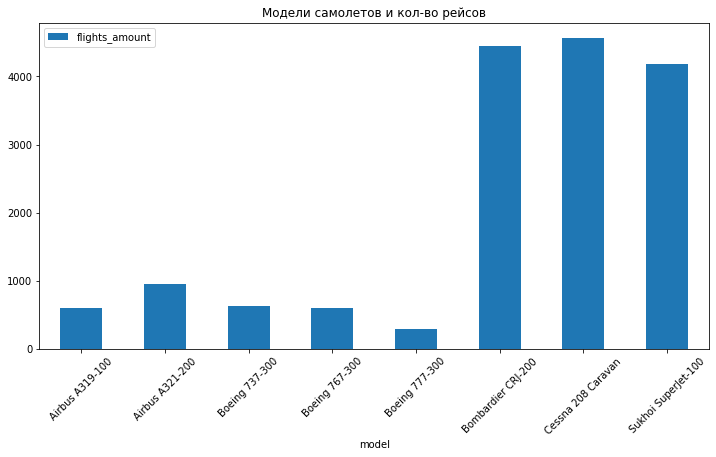

In [11]:
query_1.groupby('model').sum().plot(kind='bar', rot=45, figsize=(12,6), title = 'Модели самолетов и кол-во рейсов')

Очевидно, что средне- и малоразмерные самолеты имеют подавляющее преимущество по числу рейсов внутри страны. Каждая модель Airbus летает в среднем не реже, чем любая модель Boeing, но американский производитель представлен тремя моделями, а европейский двумя, так что общим числом рейсов Boeing превосходит Airbus. 

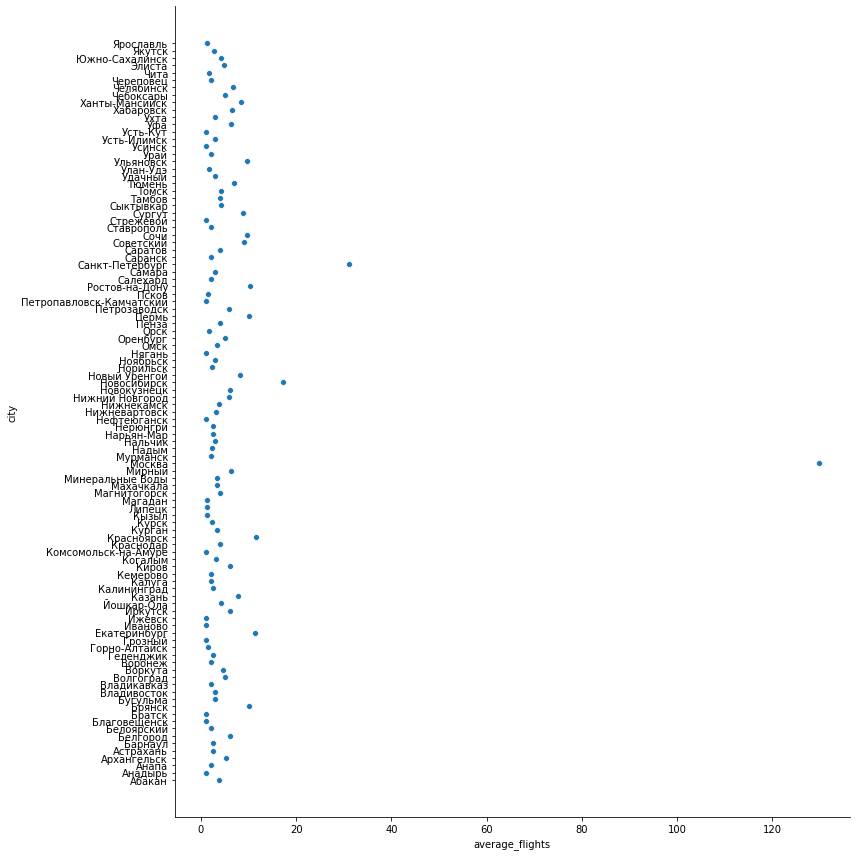

In [12]:
sns.relplot(data = query_3
            ,y = 'city'
            ,x = 'average_flights'
            ,height = 12
            ,
            )

Москва выглядит как выброс. График будет куда информативнее без нее.

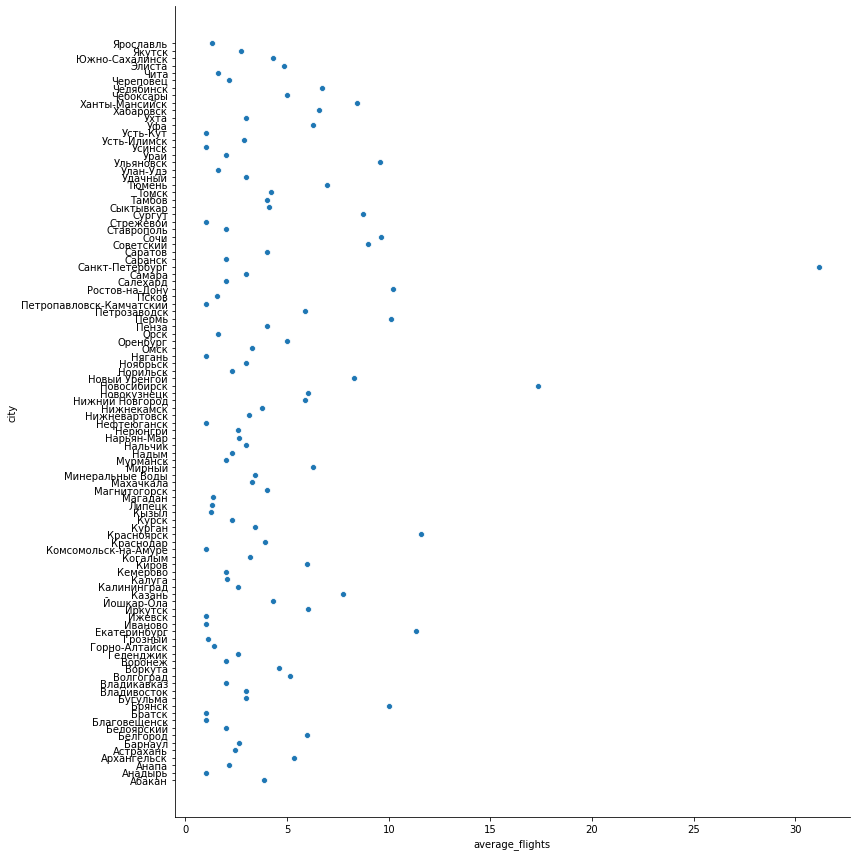

In [13]:
sns.relplot(data = query_3[query_3['city'] != 'Москва']
            ,y = 'city'
            ,x = 'average_flights'
            ,height = 12
            ,
            )

Теперь далеко от всех Петербург, но здесь видно, что подавляющее число аэропортов в среднем принимает до пяти внутрироссийских рейсов в день, по крайней мере в выбранный период. Второй большой блок - от 5 до 10 рейсов в день, а выше уже топ-10.

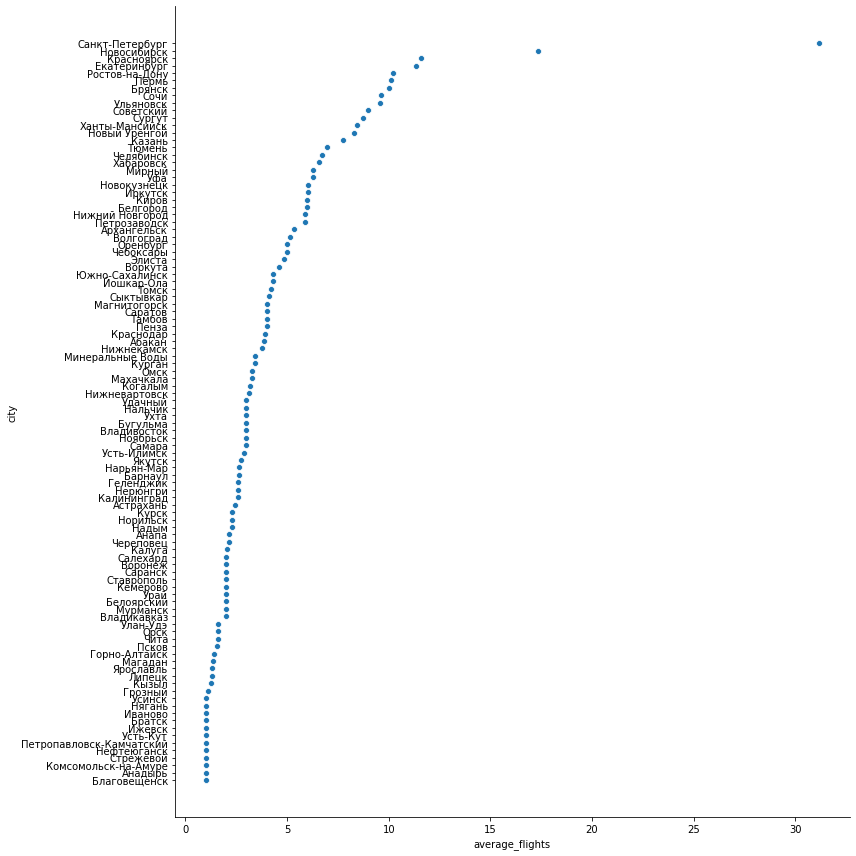

In [14]:
sns.relplot(data = query_3[query_3['city'] != 'Москва'].sort_values(by='average_flights')
            ,y = 'city'
            ,x = 'average_flights'
            ,height = 12
            ,
            )

Так еще лучше. Можно еще Питер убрать, чтобы еще ближе масштабироваться.

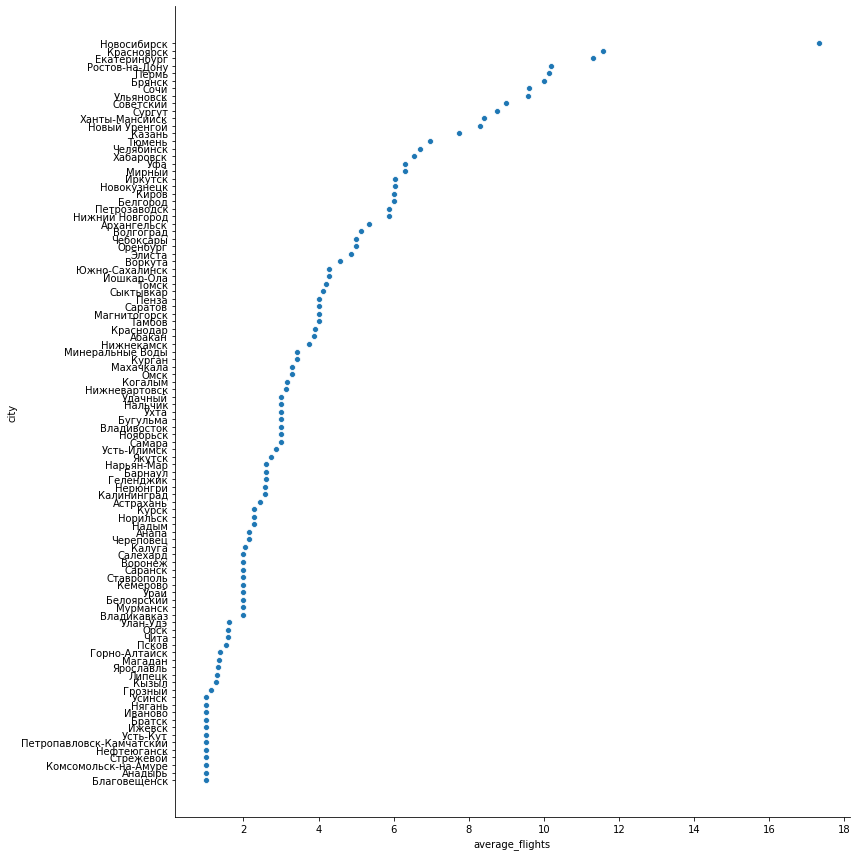

In [15]:
sns.relplot(data = query_3[(query_3['city'] != 'Москва') & (query_3['city'] != 'Санкт-Петербург')].sort_values(by='average_flights')
            ,y = 'city'
            ,x = 'average_flights'
            ,height = 12
            ,
            )

Интересно, что вплотную к топу примыкают северные города - Советский, Сургут, Ханты-Мансийск, Новый Уренгой. Это связано с особенностями логистики: лето короткое, осенью транспортная доступность сужается исключительно до воздушной. Здесь, вероятно, "спрятаны" полеты на средне- и малоразмерных самолетах.

In [16]:
top_cities = query_3.sort_values(by='average_flights', ascending = False).head(10)
top_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


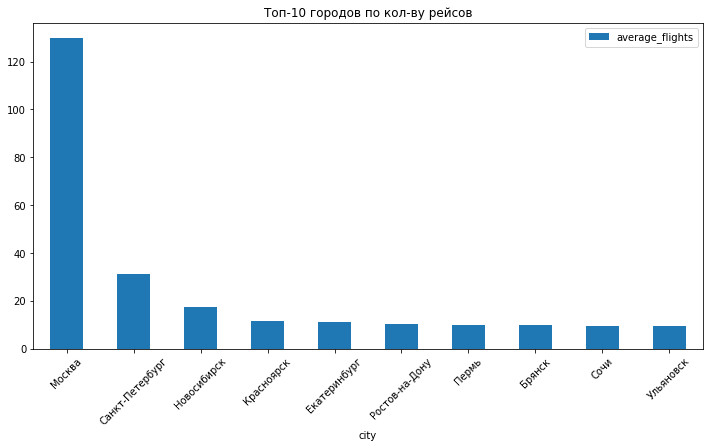

In [17]:
top_cities.plot(kind='bar', rot=45, figsize=(12,6), title = 'Топ-10 городов по кол-ву рейсов', x='city')

Визуализация топ-10 городов по среднему числу ежедневных рейсов наводит на мысль, что только топ-3 можно считать более-менее устойчивой группой (Москва, Питер, Новосибирск). Остальные города из топа настолько близки по этому показателю, что могут располагаться в любом порядке.

Перейдем к проверке гипотезы. Гипотеза Н0: Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время. Альтернативная гипотеза Н1: Средний спрос на билеты во время фестивалей отличается (выше или ниже)от  среднего спроса на билеты в обычное время.

In [20]:
alpha = .01
results = st.ttest_ind(
    query_last[query_last['festival_week'] > 0]['ticket_amount'], 
    query_last[query_last['festival_week'] == 0]['ticket_amount']
)
print('p-значение', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


Вероятность получить наблюдаемое соотношение при условии правильности нулевой гипотезы более 9,6%, поэтому исходя из имеющихся данных эту гипотезу отвергнуть нельзя - даже при пороговом значении 0,01. 

### Выводы

Исходя из имеющихся данных можно сделать следующие выводы:
- По среднему числу ежедневных рейсов среди городов с отрывом лидирует Москва (130 рейсов в день), затем Питер (вчетверо меньше), Новосибирск, Красноярск, Екатеринбург. Устойчивой группой можно считать топ-3 городов по среднему числу ежедневных внутрироссийских рейсов, остальные города из топ-10 крайне близки по числу рейсов и могут меняться позициями в пределах указанного диапазона;
- Основная масса городов обслуживает в среднем от 1 до 5 рейсов. Следующая группа обслуживат от 5 до 10 рейсов, затем идет топ-10;
- Близко к топ-10 держатся северные города - Советский, Сургут, Ханты-Мансийск, Новый Уренгой. Скорее всего это связано с транспортной доступностью этих городов;
- Средне- и малоразмерные самолеты имеют подавляющее преимущество по числу рейсов внутри страны;
- Гипотезу о равенстве спроса на авиабилеты вне зависимости от расписания фестивалей опровергнуть не получилось.